In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import sys
sys.path.append("C:\\Users\\alicl\\Documents\\GitHub\\SDM-Project\\mcts")

from main import MCTS
from gripper import Gripper

In [2]:
# helper functions to plot gripper geometry
def plot_one_link(ax, link):
    x = link[0]
    y = link[1]
    ax.plot(x, y)
    
def plot_gripper(ax, link_array):
    for link in link_array:
        plot_one_link(ax, link)

In [3]:
# initialize varying values of theta
pinch_start = (np.deg2rad(50), 0, 0)
pinch_goal = (np.deg2rad(85), np.deg2rad(25), np.deg2rad(20))
wrap_start = (np.deg2rad(30), 0, 0)
wrap_goal = (np.deg2rad(60), np.deg2rad(40), np.deg2rad(25))

In [20]:
# finding average time and cost
time_history = []
cost_history = []
print(f"Pinch grasp, start {np.rad2deg(pinch_start)}, end goal {np.rad2deg(pinch_goal)}")
for i in range(10):
    print("Running mcts...")
    start = time.time()
    mcts = MCTS(start_pos=pinch_start, goal_pos=pinch_goal)
    mcts.main()
    end = time.time()
    print(f"Found goal in {end-start} seconds")
    
    time_history.append(end-start)
    cost = mcts.start_node.real_cost
    cost_history.append(cost)
    

# angles = mcts.angle_path
# controls = mcts.control_path
# cost = mcts.cost_path



Pinch grasp, start [50.  0.  0.], end goal [85. 25. 20.]
Running mcts...
Found goal in 14.888071537017822 seconds
Running mcts...
Found goal in 18.17380690574646 seconds
Running mcts...
Found goal in 20.42236089706421 seconds
Running mcts...
Found goal in 17.03868007659912 seconds
Running mcts...
Found goal in 16.479369401931763 seconds
Running mcts...
Found goal in 17.54686188697815 seconds
Running mcts...
Found goal in 15.91897463798523 seconds
Running mcts...
Found goal in 15.964978456497192 seconds
Running mcts...
Found goal in 18.08962345123291 seconds
Running mcts...
Found goal in 19.500035524368286 seconds


In [22]:
avg_time = np.mean(time_history)
avg_cost = np.mean(cost_history)

print(avg_time, avg_cost)
print(np.std(time_history), np.std(cost_history))

17.402276277542114 153.4156953116294
1.6180639409049697 6.64584675274078


In [24]:
starting_proximal_pressures = [(np.deg2rad(25)), (np.deg2rad(30)), (np.deg2rad(35)), (np.deg2rad(40)),
                               (np.deg2rad(45)), (np.deg2rad(50)), (np.deg2rad(55)), (np.deg2rad(60))]

starting_pressures = [(np.deg2rad(25), 0, 0), (np.deg2rad(30), 0, 0), (np.deg2rad(35), 0, 0), (np.deg2rad(40), 0, 0), 
                      (np.deg2rad(45), 0, 0), (np.deg2rad(50), 0, 0), (np.deg2rad(55), 0, 0), (np.deg2rad(60), 0, 0)]

In [29]:
# plotting time and cost vs proximal joint starting pressure
pinch_times = []
pinch_costs = []
for i, start_pressure in enumerate(starting_pressures):
    print(f"Pinch grasp, start {np.rad2deg(start_pressure)}, end goal {np.rad2deg(pinch_goal)}")
    print("Running mcts...")
    start = time.time()
    mcts = MCTS(start_pos=start_pressure, goal_pos=pinch_goal)
    mcts.main()
    end = time.time()
    print(f"Found goal in {end-start} seconds")
    
    pinch_times.append(end-start)
    cost = mcts.start_node.real_cost
    pinch_costs.append(cost)

Pinch grasp, start [25.  0.  0.], end goal [85. 25. 20.]
Running mcts...


KeyboardInterrupt: 

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2)

ax[0].plot(starting_proximal_pressures, pinch_times)

ax[1].plot(starting_proximal_pressures, pinch_costs)

In [5]:
# parse vars 

theta_1 = []
theta_2 = []
theta_3 = []
for angle_set in angles:
    theta_1.append(angle_set[0])
    theta_2.append(angle_set[1])
    theta_3.append(angle_set[2])

for _ in range(10):
    theta_1.append(theta_1[-1])
    theta_2.append(theta_2[-1])
    theta_3.append(theta_3[-1])

p1 = []
p2 = []
p3 = []
fa = []
for control_var in controls:
    p1.append(control_var[0])
    p2.append(control_var[1])
    p3.append(control_var[2])
    fa.append(control_var[3])

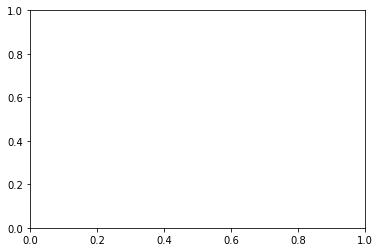

In [14]:
# animate the gripper 

fig, ax = plt.subplots()
# function that draws each frame of the animation
def animate(i):
    ax.clear()
    grp = Gripper(angles=[theta_1[i], theta_2[i], theta_3[i]])
    grp.create_gripper()
    plot_gripper(ax, grp.link_array)
    ax.set_xlim(-8,8)
    ax.set_ylim(-1,7)
    ax.set_aspect('equal')
    goal_display = np.round(np.rad2deg(wrap_goal))
    ax.set_title(f"Wrap Grasp: Goal Pos {goal_display} deg")

# run the animation
ani = FuncAnimation(fig, animate, len(theta_1))
# ani.save('gifs/wrap_wide1.gif', writer='imagemagick', fps=60)

C:\Users\alicl\AppData\Local\Temp/ipykernel_13276/403586041.py:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.1)


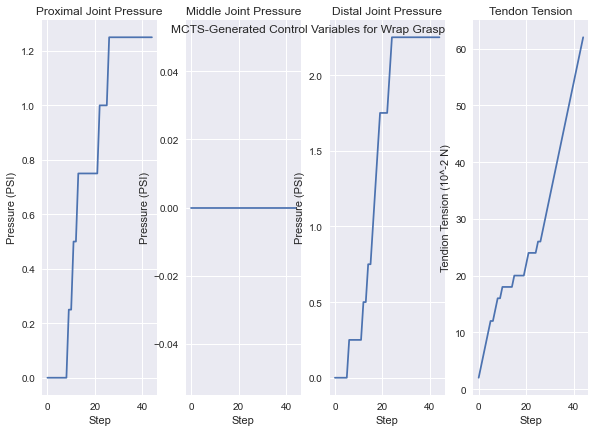

In [16]:
# plot the control variables 

iterations = np.arange(0, len(p1), 1)

plt.style.use('seaborn')
fig, ax = plt.subplots(1,4)
plt.tight_layout(0.1)

ax[0].plot(iterations, p1)
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Pressure (PSI)")
ax[0].set_title("Proximal Joint Pressure")

ax[1].plot(iterations, p2)
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Pressure (PSI)")
ax[1].set_title("Middle Joint Pressure")

ax[2].plot(iterations, p3)
ax[2].set_xlabel("Step")
ax[2].set_ylabel("Pressure (PSI)")
ax[2].set_title("Distal Joint Pressure")

ax[3].plot(iterations, fa)
ax[3].set_xlabel("Step")
ax[3].set_ylabel("Tendion Tension (10^-2 N)")
ax[3].set_title("Tendon Tension")

plt.suptitle("MCTS-Generated Control Variables for Wrap Grasp")

plt.show()

In [ ]:
# plot cost vs time